In [2]:
import networkx as nx
# from networkx.algorithms import community
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def consDyn(G, x_0, tBound):
    L = nx.laplacian_matrix(G)
    def laplDyn(t, y): return -L.dot(y)
    return odeint(laplDyn, x_0, tBound, tfirst=True)

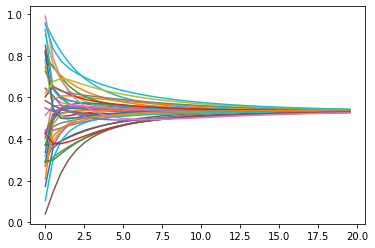

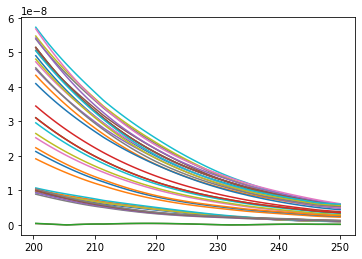

In [4]:
G = nx.read_edgelist('out.hiv', comments='%')
N = len(G.nodes)
x_0 = np.random.rand(N)
tf = 250
t = np.linspace(0, tf, 500)
sol = consDyn(G, x_0, t)
plt.plot(t[:40], sol[:40,:])
plt.figure()
plt.plot(t[-100:], np.abs(sol[-100:,:]-np.sum(x_0)/N))

In [183]:
def PageRank(G, alpha, u=np.ones(len(G.nodes))/len(G.nodes)):
    A = nx.to_numpy_matrix(G)
    k = np.sum(A, axis=1)
    dangling = np.broadcast_to(k==0, np.shape(A))
    not_dangling = np.broadcast_to(k!=0, np.shape(A))
    T = np.zeros(np.shape(A))
    T[not_dangling] = np.resize((A/k)[not_dangling], np.shape(T[not_dangling]))
    T[dangling] = np.resize(u, np.shape(T[dangling]))
    T1 = alpha*T + (1-alpha)*u

In [184]:
u = np.ones(len(G.nodes))/len(G.nodes)
u[2] = 0.
PageRank(G, .75, u)
print(np.resize(np.array([5, 7, 9]), 12))

[5 7 9 5 7 9 5 7 9 5 7 9]


In [14]:
x = np.array([1, 1, 0])
x += 1
print(x)
x[np.array([1, 1, 0]).astype(bool)] = 0
print((np.array([-1, 1, 0]).astype(bool)).astype(int))

[2 2 1]
[1 1 0]
